# Your first convolutional neural network

# imports

In [5]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
#from keras.utils import to_categorical
import keras.backend as K
import tensorflow as tf

from keras.datasets import cifar10

# data

In [6]:
NUM_CLASSES = 10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

In [9]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [20]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [21]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [12]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


# train

In [23]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9540 - accuracy: 0.2994 - val_loss: 1.7586 - val_accuracy: 0.3934
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7427 - accuracy: 0.4032 - val_loss: 1.7277 - val_accuracy: 0.3997
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7119 - accuracy: 0.4155 - val_loss: 1.7212 - val_accuracy: 0.4033
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7069 - accuracy: 0.4171 - val_loss: 1.7174 - val_accuracy: 0.4086
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6931 - accuracy: 0.4225 - val_loss: 1.7118 - val_accuracy: 0.4096
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6874 - accuracy: 0.4255 - val_loss: 1.7143 - val_accuracy: 0.4101
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6857 - accuracy: 0.4269 - val_loss: 1.7163 - val_accuracy:

In [25]:
model.layers[6].get_weights()

IndexError: ignored

# analysis

In [26]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 0s 6ms/step - loss: 1.7193 - accuracy: 0.4119


[1.7193056344985962, 0.41190001368522644]

In [27]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

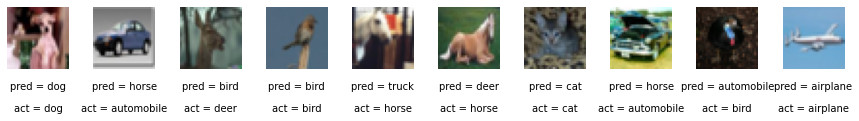

In [28]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
